In [1]:
from chan_modeling.archiving import MyThreads, clean, train, analyze, MySentences, get_single_vector
from chan_modeling.lda_modeling import train_lda_model, prepare_dictionary, get_topics_for_document
from chan_modeling.functional_helpers import nth
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.word2vec import FAST_VERSION
import pprint
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train(50, 4, fname='test_model', dir_name='biz_archive')

In [2]:
analyze(50, 4, vector_fname='models/test_model_vectors', test_file_name='test_file.txt')

2018-08-07 06:01:20,855 : INFO : loading Word2VecKeyedVectors object from models/test_model_vectors
2018-08-07 06:01:21,127 : INFO : setting ignored attribute vectors_norm to None
2018-08-07 06:01:21,129 : INFO : loaded models/test_model_vectors
2018-08-07 06:01:21,134 : INFO : precomputing L2-norms of word weight vectors


In [2]:
vec = get_single_vector('altcoin', 'models/test_model_vectors')

2018-08-07 06:01:42,422 : INFO : loading Word2VecKeyedVectors object from models/test_model_vectors
2018-08-07 06:01:42,696 : INFO : setting ignored attribute vectors_norm to None
2018-08-07 06:01:42,698 : INFO : loaded models/test_model_vectors
2018-08-07 06:01:42,702 : INFO : precomputing L2-norms of word weight vectors


In [98]:
def plot_word(word, plt, cosine_score, y, count):
    # draw a point on the line
    px = (10*((cosine_score - .5) *2))
    plt.plot(px,y, 'ro', ms = 15, mfc = 'r')

    align='right'
    # add an arrow
    annotation_y = 2
    #adjust up or down
    if count % 2 == 0:
        annotation_y = -2
 
        
    plt.annotate("{} @ {}".format(word, round(cosine_score, 2)), (px,y), xytext = (px - .1, y + annotation_y), 
                  arrowprops=dict(facecolor='black', shrink=0.1), 
                  horizontalalignment='right')


In [99]:
def plot_similarity_vector(vector, main_word):
    # set up the figure
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

    # draw lines
    xmin = 0
    xmax = 10
    y = 5
    height = 1

    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)

    for count, component in enumerate(vector):
        plot_word(component[0], plt, component[1], y, count)

    # add numbers
    plt.text(xmin - 0.01, y, '.5', horizontalalignment='right')
    plt.text(xmax + 0.01, y, '1', horizontalalignment='left')

    plt.axis('off')
    plt.show()

In [107]:
def plot_vector(word, model):
    vec = get_single_vector(word, model)
    plot_similarity_vector(vec, word)

2018-08-07 06:18:11,582 : INFO : loading Word2VecKeyedVectors object from models/test_model_vectors
2018-08-07 06:18:11,887 : INFO : setting ignored attribute vectors_norm to None
2018-08-07 06:18:11,888 : INFO : loaded models/test_model_vectors
2018-08-07 06:18:11,889 : INFO : precomputing L2-norms of word weight vectors


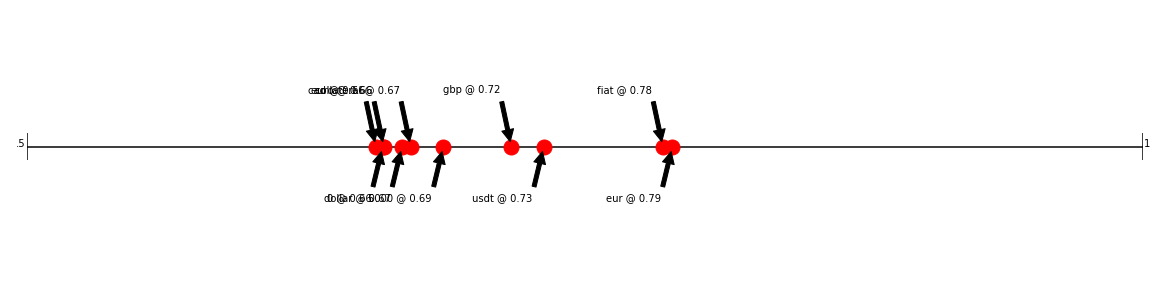

In [111]:
plot_vector('usd', 'models/test_model_vectors')

In [3]:
# phrases = gensim.models.Phrases(threads)

In [4]:
# bigrams = gensim.models.phrases.Phraser(phrases)

In [5]:
# nth(bigrams[threads], 45)

In [6]:
doc_term_matrix, dictionary = prepare_dictionary(threads)

2018-07-23 05:20:33,119 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-23 05:21:07,445 : INFO : adding document #10000 to Dictionary(93571 unique tokens: ['nuls', 'status', 'update', 'considering', 'buying']...)
2018-07-23 05:21:36,117 : INFO : adding document #20000 to Dictionary(156199 unique tokens: ['nuls', 'status', 'update', 'considering', 'buying']...)
2018-07-23 05:21:49,536 : INFO : built Dictionary(183094 unique tokens: ['nuls', 'status', 'update', 'considering', 'buying']...) from 24526 documents (total 3231880 corpus positions)


In [ ]:
model = train_lda_model(100, dictionary, doc_term_matrix, 6, 10)

In [8]:
# model = LdaModel.load('models/ldamodel')

In [11]:
freqs = Counter()
get_highest_prob_topics = lambda x: x[1] > .1
first = itemgetter(0)
for thread in threads:
    tops = get_topics_for_document(thread, model, dictionary)
    topics = map(first, list(filter(get_highest_prob_topics, tops)))
    freqs[frozenset(topics)] += 1

In [13]:
second_element = itemgetter(1)
more_than_ten_documents = lambda x: x[1] > 10
more_than_one_topic = lambda x: len(x[0]) > 1
only_one_topic = lambda x: len(x[0]) == 1

key_topics = sorted(freqs.items(), key=second_element, reverse=True)
groups = list(filter(only_one_topic, key_topics))
groups = list(filter(more_than_ten_documents, groups))
pprint.pprint(groups)

[(frozenset({17}), 396),
 (frozenset({56}), 240),
 (frozenset({2}), 226),
 (frozenset({26}), 165),
 (frozenset({52}), 150),
 (frozenset({95}), 58),
 (frozenset({96}), 54),
 (frozenset({57}), 46),
 (frozenset({65}), 42),
 (frozenset({20}), 38),
 (frozenset({8}), 26),
 (frozenset({67}), 25),
 (frozenset({89}), 21),
 (frozenset({88}), 20),
 (frozenset({23}), 19),
 (frozenset({31}), 17),
 (frozenset({39}), 16),
 (frozenset({53}), 15),
 (frozenset({76}), 14),
 (frozenset({54}), 13),
 (frozenset({9}), 12),
 (frozenset({34}), 11),
 (frozenset({50}), 11),
 (frozenset({86}), 11),
 (frozenset({51}), 11),
 (frozenset({75}), 11)]


In [ ]:
group_sets, _ = zip(*groups)
for grp in group_sets:
    print("="*30)    
    print(list(grp))
    for topic in zip(grp, map(model.show_topic, grp)):
        pprint.pprint(list(topic))
        print('\n')    

In [ ]:
for topic in zip(topics, map(model.show_topic, topics)):
    print(topic)
    print('\n')

In [ ]:
model.top_topics(dictionary=dictionary, corpus=doc_term_matrix)